In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)


In [21]:
train_df = pd.read_csv(r"C:\Users\Wintewarrior\Downloads\archive (1)\fraudTrain.csv")
test_df  = pd.read_csv(r"C:\Users\Wintewarrior\Downloads\archive (1)\fraudTest.csv")

train_df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [22]:
print(train_df.shape)
print(test_df.shape)

(1296675, 23)
(555719, 23)


In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [25]:
train_df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [20]:
train_df.isnull().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

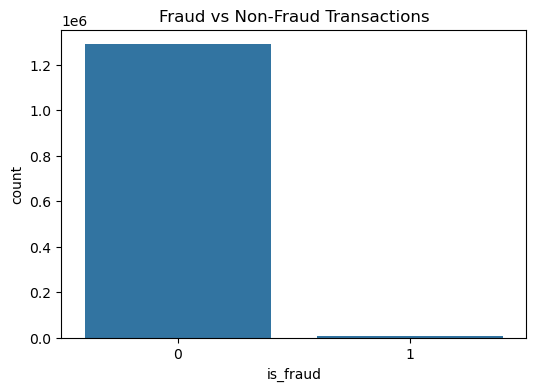

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=train_df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


In [27]:
drop_cols = [
    'Unnamed: 0',
    'cc_num',
    'first', 'last',
    'street', 'city', 'state',
    'zip',
    'trans_num'
]

train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)


In [28]:
for df in [train_df, test_df]:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    
    df['trans_hour'] = df['trans_date_trans_time'].dt.hour
    df['trans_day'] = df['trans_date_trans_time'].dt.day
    df['trans_month'] = df['trans_date_trans_time'].dt.month
    df['trans_weekday'] = df['trans_date_trans_time'].dt.weekday


In [29]:
train_df.drop(columns=['trans_date_trans_time'], inplace=True)
test_df.drop(columns=['trans_date_trans_time'], inplace=True)


In [30]:
for df in [train_df, test_df]:
    df['dob'] = pd.to_datetime(df['dob'])
    df['age'] = (pd.Timestamp.now() - df['dob']).dt.days // 365


In [31]:
train_df.drop(columns=['dob'], inplace=True)
test_df.drop(columns=['dob'], inplace=True)


In [32]:
cat_cols = train_df.select_dtypes(include='object').columns
cat_cols


Index(['merchant', 'category', 'gender', 'job'], dtype='object')

In [33]:
encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

train_df[cat_cols] = encoder.fit_transform(train_df[cat_cols])
test_df[cat_cols]  = encoder.transform(test_df[cat_cols])


In [34]:
# step9
scaler = StandardScaler()

num_cols = train_df.drop('is_fraud', axis=1).columns

train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols]  = scaler.transform(test_df[num_cols])


In [35]:
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']

X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']


In [38]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.995531914510751
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [39]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9965324201619884
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.53      0.80      0.64      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.90      0.82    555719
weighted avg       1.00      1.00      1.00    555719



In [40]:
# RandomForest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [41]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9987979536420385
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.96      0.72      0.82      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.86      0.91    555719
weighted avg       1.00      1.00      1.00    555719



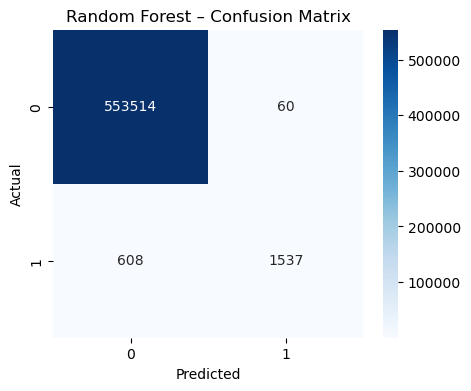

In [42]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest – Confusion Matrix")
plt.show()


In [43]:
y_prob = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9730988981007949


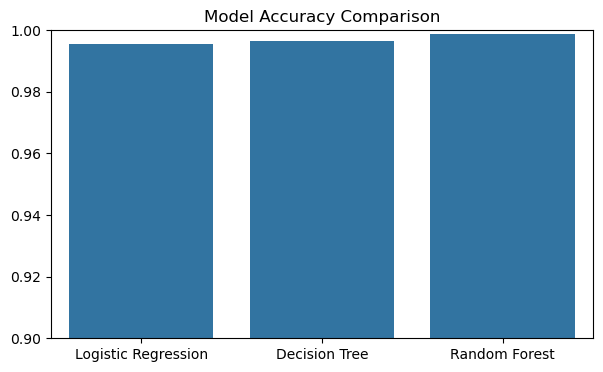

In [44]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

plt.figure(figsize=(7,4))
sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1.0)
plt.show()


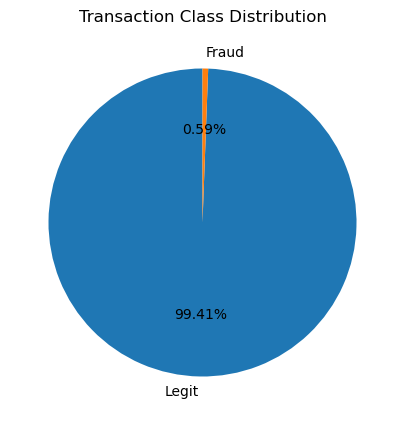

In [46]:
counts = plot_df['is_fraud'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(
    counts,
    labels=['Legit', 'Fraud'],
    autopct='%1.2f%%',
    startangle=90
)
plt.title("Transaction Class Distribution")
plt.show()


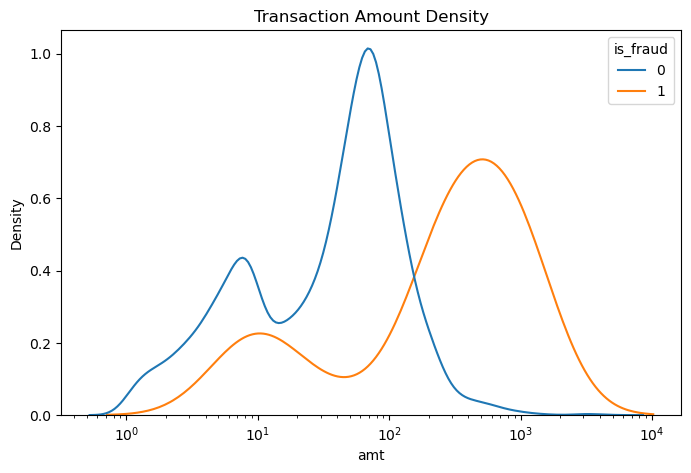

In [49]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=plot_df,
    x='amt',
    hue='is_fraud',
    log_scale=True,
    common_norm=False
)

plt.title("Transaction Amount Density")
plt.show()


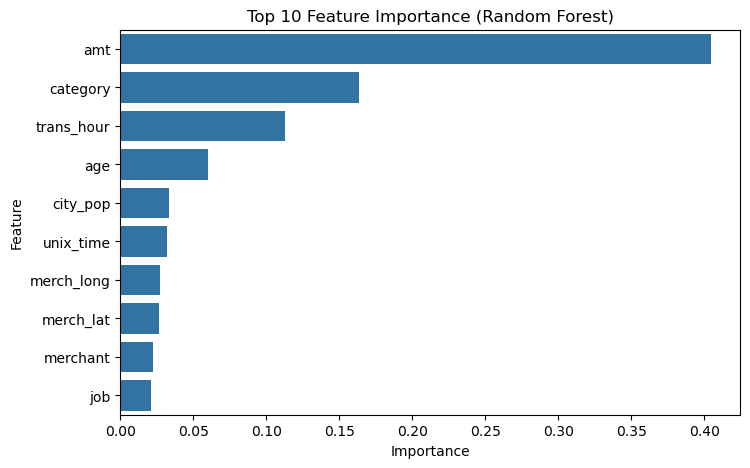

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feature_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})

top_10 = feature_imp.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_10,
    x='Importance',
    y='Feature'
)
plt.title("Top 10 Feature Importance (Random Forest)")
plt.show()
